In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

In [64]:
# Load dataset without column names
df = pd.read_csv('analysis_data_withTarget/analysis_data_001.csv', header=None)

In [65]:
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

In [66]:
# Generate column names for channels
num_channels = X.shape[1]  # Get the number of channels
column_names = ['Channel ' + str(i) for i in range(1, num_channels + 1)]

In [67]:
# Set the column names to the DataFrame
X.columns = column_names

In [68]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Initialize and train a Random Forest classifier for the entire dataset
model_all = RandomForestClassifier()
model_all.fit(X_train_scaled, y_train)

# Calculate accuracy for the entire dataset
y_pred_all = model_all.predict(X_test_scaled)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(accuracy_all)

# Extract feature importances for the entire dataset
feature_importances_all = model_all.feature_importances_

# Create a DataFrame to hold feature importances with column names for the entire dataset
feature_importance_df_all = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances_all})

# Sort the DataFrame by Importance in descending order for the entire dataset
feature_importance_df_all = feature_importance_df_all.sort_values(by='Importance', ascending=False)

0.625


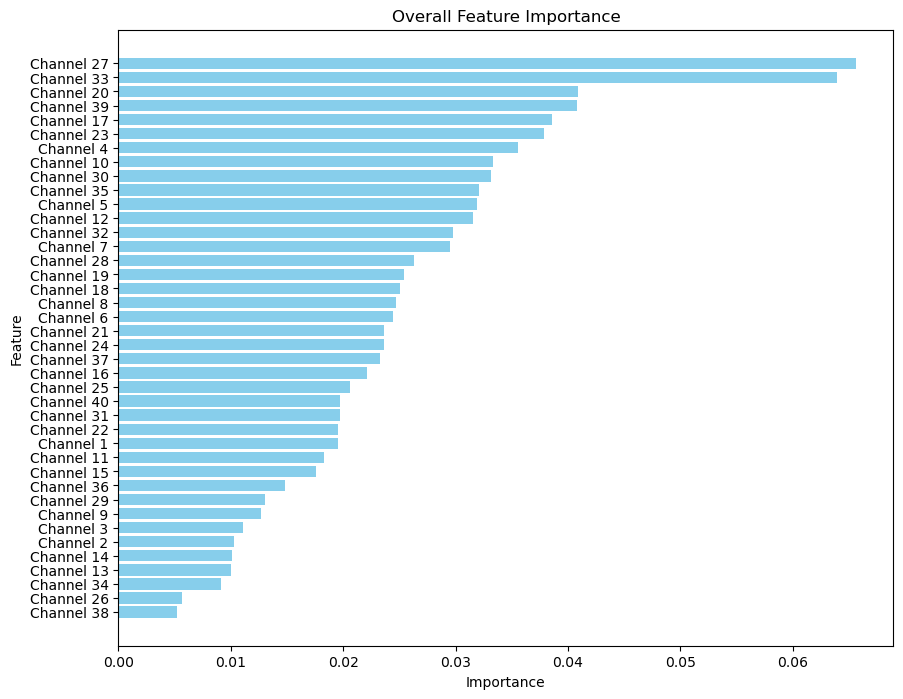

In [71]:
# Plotting the horizontal bar graph for feature importance of the entire dataset
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df_all['Feature'], feature_importance_df_all['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Overall Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

In [72]:
# Initialize and train a Random Forest classifier for "accept" class
model_accept = RandomForestClassifier()
model_accept.fit(X_train_scaled, (y_train == 1).astype(int))

# Initialize and train a Random Forest classifier for "deny" class
model_deny = RandomForestClassifier()
model_deny.fit(X_train_scaled, (y_train == 2).astype(int))

RandomForestClassifier()

In [81]:
# Calculate accuracy for "accept" class
y_pred_accept = model_accept.predict(X_test_scaled)
accuracy_accept = accuracy_score(y_test, y_pred_accept)
print(accuracy_accept)

# Calculate accuracy for "deny" class
y_pred_deny = model_deny.predict(X_test_scaled)
accuracy_deny = accuracy_score(y_test, y_pred_deny)
print(accuracy_deny)

0.625
0.0


In [74]:
# Extract feature importances for "accept" class
feature_importances_accept = model_accept.feature_importances_

# Create a DataFrame to hold feature importances with column names for "accept" class
feature_importance_df_accept = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances_accept})

# Sort the DataFrame by Importance in descending order for "accept" class
feature_importance_df_accept = feature_importance_df_accept.sort_values(by='Importance', ascending=False)

In [75]:
# Extract feature importances for "deny" class
feature_importances_deny = model_deny.feature_importances_

# Create a DataFrame to hold feature importances with column names for "deny" class
feature_importance_df_deny = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances_deny})

# Sort the DataFrame by Importance in descending order for "deny" class
feature_importance_df_deny = feature_importance_df_deny.sort_values(by='Importance', ascending=False)

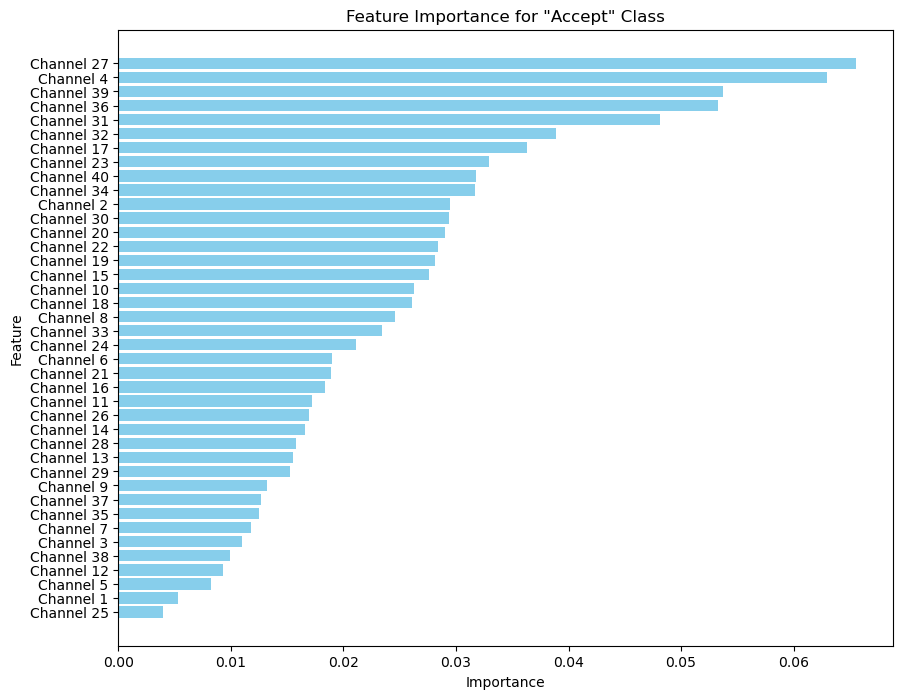

In [76]:
# Plotting the horizontal bar graph for "accept" class
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df_accept['Feature'], feature_importance_df_accept['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for "Accept" Class')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

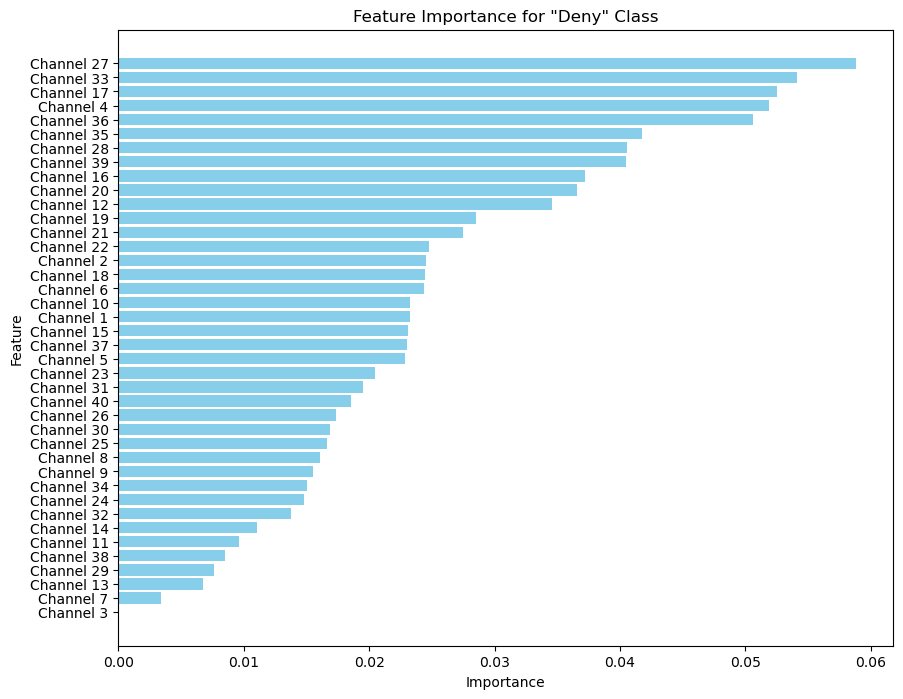

In [77]:
# Plotting the horizontal bar graph for "deny" class
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df_deny['Feature'], feature_importance_df_deny['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for "Deny" Class')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

In [78]:
# Confusion matrix for the entire dataset
cm_all = confusion_matrix(y_test, y_pred_all)
print("Confusion Matrix for the Entire Dataset:")
print(cm_all)

Confusion Matrix for the Entire Dataset:
[[5 0]
 [3 0]]


In [79]:
# Plot ROC curve for the entire dataset
plt.figure(figsize=(8, 6))
roc_curve(model_all, X_test_scaled, y_test)
plt.title('ROC Curve for the Entire Dataset')
plt.show()

# # Plot ROC curve for "accept" class
# plt.figure(figsize=(8, 6))
# plot_roc_curve(model_accept, X_test_scaled, (y_test == 1).astype(int))
# plt.title('ROC Curve for "Accept" Class')
# plt.show()

# # Plot ROC curve for "deny" class
# plt.figure(figsize=(8, 6))
# plot_roc_curve(model_deny, X_test_scaled, (y_test == 2).astype(int))
# plt.title('ROC Curve for "Deny" Class')
# plt.show()

TypeError: too many positional arguments

<Figure size 800x600 with 0 Axes>